In [29]:
import pandas as pd
import joblib

demo = joblib.load('data/demo.pkl')

In [30]:
icg_input = demo['icg_input']
icg_input

,Simulation Case Conditions_Feed Rate_Feed from V615 Btm_m3/hr,Simulation Case Conditions_Feed Rate_Feed from V615 Btm NA_wt%,Simulation Case Conditions_Feed Rate_Feed from V615 Btm Benzene_wt%,Simulation Case Conditions_Feed Rate_Feed from V615 Btm Toluene_wt%,Simulation Case Conditions_Feed Rate_Feed from C820 Dist_m3/hr,Simulation Case Conditions_Feed Rate_Feed from C820 Dist NA_wt%,Simulation Case Conditions_Feed Rate_Feed from C820 Dist Benzene_wt%,Simulation Case Conditions_Feed Rate_Feed from C820 Dist Toluene_wt%,Simulation Case Conditions_Feed Rate_Feed from T651_m3/hr,Simulation Case Conditions_Feed Rate_Feed from T651 NA_wt%,Simulation Case Conditions_Feed Rate_Feed from T651 Benzene_wt%,Simulation Case Conditions_Feed Rate_Feed from T651 Toluene_wt%,Simulation Case Conditions_Spec 1 : Benzene in C620 Sidedraw_wt%,Simulation Case Conditions_Spec 2 : NA in Benzene_ppmw,Tatoray Stripper C620 Operation_Specifications_Spec 2 : Distillate Rate_m3/hr,Benzene Column C660 Operation_Specifications_Spec 3 : Toluene in Benzene_ppmw,Tatoray Stripper C620 Operation_Specifications_Spec 1 : Receiver Temp_oC
139-017,200.0,1.116023,11.152225,48.745979,15.0,2.338977,74.302254,17.467825,32.0,0.0911,20.854397,74.689774,80.0,920.0,2.75,2.5,36.0


In [31]:
c620_feed = demo['c620_feed']
c620_feed

,Combined Feed to Tatoray Stripper C620_Detailed Composition_Hydrogen_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Methane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Ethane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Propane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Butane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Pentane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Hexane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Benzene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Cyclohexane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Heptane_wt%,...,Combined Feed to Tatoray Stripper C620_Detailed Composition_Indane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_1-Methyl-4-n-propylbenzene_wt%,"Combined Feed to Tatoray Stripper C620_Detailed Composition_1,2-Diethylbenzene_wt%",Combined Feed to Tatoray Stripper C620_Detailed Composition_5-Ethyl-m-xylene_wt%,"Combined Feed to Tatoray Stripper C620_Detailed Composition_1,4-Diethylbenzene_wt%","Combined Feed to Tatoray Stripper C620_Detailed Composition_1,2,3,5-Tetramethylbenzene_wt%",Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Pentylbenzene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Hexylbenzene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Nitrogen_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Oxygen_wt%
139-017,0.0,0.018591,0.450835,0.41517,0.12414,0.062616,0.013019,15.601887,0.006341,0.012851,...,0.052055,0.00093,0.02045,0.77618,0.0,0.894233,0.327204,0.140363,0.0,0.0


In [32]:
t651_feed = demo['t651_feed']

# 觀察這組樣本的三項spec

In [33]:
print(icg_input['Simulation Case Conditions_Spec 1 : Benzene in C620 Sidedraw_wt%'].values[0])
print(icg_input['Simulation Case Conditions_Spec 2 : NA in Benzene_ppmw'].values[0])
print(icg_input['Benzene Column C660 Operation_Specifications_Spec 3 : Toluene in Benzene_ppmw'].values[0])

80.0
920.0
2.499999828


## 利用兩次試算達成推薦功能

In [34]:
import autorch
from FV2 import AllSystem
from configV2 import config

In [35]:
f = joblib.load('model/allsystem.pkl')

In [36]:
c620_wt,c620_op,c660_wt,c660_op,c670_wt,c670_op = f.inference(icg_input.copy(),c620_feed.copy(),t651_feed.copy())

In [37]:
# 改變spec後二次試算
icg_input_2 = icg_input.copy()
c620_feed_2 = c620_feed.copy()
t651_feed_2 = t651_feed.copy()
icg_input_2['Simulation Case Conditions_Spec 1 : Benzene in C620 Sidedraw_wt%'] = 70
icg_input_2['Simulation Case Conditions_Spec 2 : NA in Benzene_ppmw'] = 980
icg_input_2['Benzene Column C660 Operation_Specifications_Spec 3 : Toluene in Benzene_ppmw'] = 10

c620_wt2,c620_op2,c660_wt2,c660_op2,c670_wt2,c670_op2 = f.inference(icg_input_2.copy(),c620_feed_2.copy(),t651_feed_2.copy())

## 計算Delta

In [38]:
c620_op2-c620_op # 苯從84降到70 c620溫度應該上升 確實有上升

,Density_Feed Properties,Density_Vent Gas Production Rate and Composition,Density_Distillate Production Rate and Composition,Density_Sidedraw Production Rate and Composition,Density_Bottoms Production Rate and Composition,Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,Tatoray Stripper C620 Operation_Heat Duty_Condenser Heat Duty_Mkcal/hr,Tatoray Stripper C620 Operation_Heat Duty_Reboiler Heat Duty_Mkcal/hr,Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC
139-017,1.788139e-07,-0.000392,0.000847,-0.001411,0.00002,-7.614456,-0.655318,-0.654632,0.684555,0.471985


In [39]:
c660_op2-c660_op

,Density_Feed Properties,Density_Vent Gas Production Rate and Composition,Density_Distillate (Benzene Drag) Production Rate and Composition,Density_Sidedraw (Benzene )Production Rate and Composition,Density_Bottoms Production Rate and Composition,Benzene Column C660 Operation_Yield Summary_Reflux Rate_m3/hr,Benzene Column C660 Operation_Heat Duty_Condenser Heat Duty_Mkcal/hr,Benzene Column C660 Operation_Heat Duty_Reboiler Heat Duty_Mkcal/hr,Benzene Column C660 Operation_Column Temp Profile_C660 Tray 6 (SD & Control)_oC,Benzene Column C660 Operation_Column Temp Profile_C660 Tray 23 (Control)_oC
139-017,-0.000881,0.011167,-0.003052,-0.000017,0.000024,6.476486,0.517909,0.375279,0.027306,0.38044


In [40]:
c670_op2-c670_op

,Density_Distillate Production Rate and Composition,Density_Bottoms Production Rate and Composition,Toluene Column C670 Operation_Yield \nSummary_Reflux Rate_m3/hr,Toluene Column C670 Operation_Heat Duty_Condenser Heat Duty_Mkcal/hr,Toluene Column C670 Operation_Heat Duty_Reboiler Heat Duty_Mkcal/hr,Toluene Column C670 Operation_Column Temp Profile_C670 Tray 24 (Control)_oC,Toluene Column C670 Operation_Column Temp Profile_C670 Btm Temp (Control)_oC
139-017,2.980232e-07,0.000002,-12.159988,-1.039232,-1.112823,-0.11171,-0.111481


# 將C620 Distillate Rate 由0 m3/hr逐步增加，觀察C660模型預測的苯不純物，直到C660 NA in BZ <=980。(此做法主要是要確保苯產品合格)

In [41]:
# 首先先觀察 原本預測的苯不純物以及對應的Distillate Rate
print(icg_input['Tatoray Stripper C620 Operation_Specifications_Spec 2 : Distillate Rate_m3/hr'].values[0])
naidx = [1,2,3,4,5,6,8,9,11,13,14,15,20,22,29]
(c660_wt.filter(regex='Side').iloc[:,naidx].sum(axis=1)*10000).values[0]

2.750000238


938.2721393081997

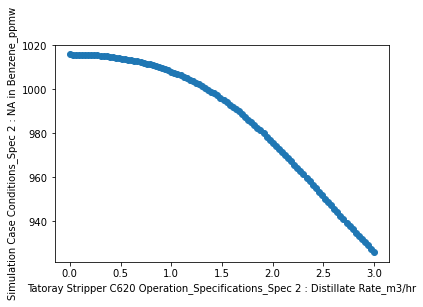

In [45]:
from tqdm import tqdm_notebook as tqdm
import numpy as np
import matplotlib.pyplot as plt

history = {'Distillate Rate':[],'苯不純物':[]}
for i in tqdm(np.linspace(0,3,100)):
    icg_input['Tatoray Stripper C620 Operation_Specifications_Spec 2 : Distillate Rate_m3/hr'] = i
    c620_wt,c620_op,c660_wt,c660_op,c670_wt,c670_op = f.inference(icg_input.copy(),c620_feed.copy(),t651_feed.copy())
    苯不純物 = (c660_wt.filter(regex='Side').iloc[:,naidx].sum(axis=1)*10000).values[0]
    history['Distillate Rate'].append(i)
    history['苯不純物'].append(苯不純物)

plt.scatter(history['Distillate Rate'],history['苯不純物'])
plt.xlabel('Tatoray Stripper C620 Operation_Specifications_Spec 2 : Distillate Rate_m3/hr')
plt.ylabel('Simulation Case Conditions_Spec 2 : NA in Benzene_ppmw')
plt.show()